In [1]:
import sys
import lightgbm as lgb
sys.path.append('../')
from data import create_training_data, create_evaluation_data2, create_large_training_data
from pipeline import run_model_training, run_hyperparameter_tuning, run_model_training_quick, run_predictions

In [31]:
test_gw = 10

In [3]:
big_df = create_large_training_data()

create large training data version 0.2
season added is: 2020-21, in UTF-8!
season added is: 2019-20, in UTF-8!
season added is: 2018-19, in other!
season added is: 2017-18, in other!
season added is: 2016-17, in other!
Creating shifted time-series features
training set made!


In [32]:
#df = create_training_data("2020-21")
eval_df = create_evaluation_data2(session="pred", gameweek_to_evaluate=test_gw)

test data version 0.4
current_gw to get data test for is 7


In [4]:
df

,name,ict_index,bps,now_cost,fdr,avg_minutes,ict_index_change,bps_change,event_points
0,Aaron Connolly,6.9,27,55,2,67.000000,3.5,30.0,1.0
1,Aaron Connolly,1.9,2,55,4,69.000000,-5.0,-25.0,8.0
2,Aaron Connolly,0.7,7,55,3,68.000000,-1.2,5.0,2.0
3,Aaron Connolly,3.0,13,55,3,56.800000,2.3,6.0,2.0
4,Aaron Connolly,0.0,0,55,2,47.333333,-3.0,-13.0,4.0
...,...,...,...,...,...,...,...,...,...
22158,Ã‡aglar SÃ¶yÃ¼ncÃ¼,2.3,13,53,2,41.161290,0.3,-12.0,6.0
22159,Ã‡aglar SÃ¶yÃ¼ncÃ¼,4.7,15,53,2,42.687500,2.4,2.0,2.0
22160,Ã‡aglar SÃ¶yÃ¼ncÃ¼,3.2,10,53,4,44.121212,-1.5,-5.0,2.0
22161,Ã‡aglar SÃ¶yÃ¼ncÃ¼,2.3,14,53,4,45.470588,-0.9,4.0,0.0


In [26]:
eval_df

,name,ict_index,bps,now_cost,avg_minutes,ict_index_change,bps_change,event_points
0,Leno,0.0,0,48,38.571429,0.0,0.0,0
1,Rúnarsson,0.0,0,40,0.000000,0.0,0.0,0
2,Willian,0.0,0,63,0.000000,0.0,0.0,0
3,Aubameyang,4.0,5,99,61.142857,-7.7,-23.0,9
4,Cédric,0.0,0,43,26.857143,0.0,0.0,0
...,...,...,...,...,...,...,...,...
608,Cundle,0.0,0,45,0.000000,0.0,0.0,0
609,Campbell,0.0,0,45,0.000000,0.0,0.0,0
610,Marques,0.0,0,40,0.000000,0.0,0.0,0
611,Hwang,13.3,61,55,62.250000,10.7,56.0,2


In [ ]:
best_hyperparams = run_hyperparameter_tuning(big_df)

In [7]:
import pickle
params = pickle.load(open("parameters_2021_28_10_18_55.pkl",'rb'))

In [8]:
params

{'n_estimators': 10000,
 'learning_rate': 0.05,
 'num_leaves': 255,
 'max_depth': 12,
 'min_data_in_leaf': 80,
 'max_bin': 200,
 'lambda_l1': 35,
 'lambda_l2': 10,
 'min_gain_to_split': 1.786357723256773,
 'bagging_fraction': 0.6000000000000001,
 'bagging_freq': 1,
 'feature_fraction': 0.7}

In [9]:
model = run_model_training(params, big_df)

C:\Users\magnu\AppData\Local\Programs\Python\Python37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 926
[LightGBM] [Info] Number of data points in the train set: 324364, number of used features: 6
[LightGBM] [Info] Start training from score 1.296035
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	training's l2: 5.66048	valid_1's l2: 5.74187
Training until validation scores don't improve for 5000 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	training's l2: 5.1883	valid_1's l2: 5.26219
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	training's l2: 4.88669	valid_1's l2: 4.95583
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	training's l2: 4.61322	valid_1's l2: 4.6782
[LightGBM] [Warning] No further spl

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

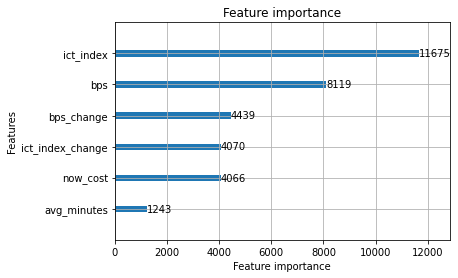

In [10]:
lgb.plot_importance(model[0])

In [17]:
used_features =  ['name','ict_index', 'bps', 'now_cost','avg_minutes', 'ict_index_change', 'bps_change']

In [19]:
eval_df

,name,ict_index,bps,now_cost,avg_minutes,ict_index_change,bps_change,event_points
0,Leno,0.0,0,47,33.75,0.0,0.0,0
1,Rúnarsson,0.0,0,40,0.00,0.0,0.0,0
2,Willian,0.0,0,63,0.00,0.0,0.0,0
3,Aubameyang,9.1,33,99,64.75,5.1,28.0,6
4,Cédric,0.0,0,43,23.50,0.0,0.0,0
...,...,...,...,...,...,...,...,...
612,Cundle,0.0,0,45,0.00,0.0,0.0,0
613,Campbell,0.0,0,45,0.00,0.0,0.0,0
614,Marques,0.0,0,40,0.00,0.0,0.0,0
615,Hwang,1.9,-1,56,67.20,-11.4,-62.0,8


In [20]:
big_df

,name,ict_index,bps,now_cost,avg_minutes,ict_index_change,bps_change,event_points
0,Aaron Connolly,3.4,-3,55,9.000000,0.0,0.0,1.0
1,Aaron Connolly,3.4,-3,55,90.000000,0.0,0.0,1.0
2,Aaron Connolly,3.4,-3,55,0.000000,0.0,0.0,1.0
3,Aaron Connolly,6.9,27,55,67.000000,3.5,30.0,1.0
4,Aaron Connolly,6.9,27,55,0.000000,0.0,0.0,8.0
...,...,...,...,...,...,...,...,...
405451,Ørjan_Nyland_27,0.0,0,43,90.000000,0.0,0.0,0.0
405452,Ørjan_Nyland_27,0.0,0,43,7.000000,0.0,0.0,0.0
405453,Ørjan_Nyland_27,0.0,0,43,12.416667,0.0,0.0,0.0
405454,Ørjan_Nyland_27,0.0,0,43,90.000000,0.0,0.0,0.0


In [33]:
preds = run_predictions(eval_df, "model_2021_28_10_19_02.pkl", session = "test", test_gw=test_gw, used_features=used_features)

Saving model...


In [34]:
preds.sort_values(by=["predicted_points"], ascending=False).head(n = 30)

,name,ict_index,bps,now_cost,avg_minutes,ict_index_change,bps_change,predicted_points,actual_gw_points,round
0,Thiago Silva,1.9,11,54,47.666667,-10.5,-35.0,13.035508,1,7
1,Toney,7.5,19,63,90.000000,-3.8,-27.0,12.809194,2,7
2,Sarr,8.8,23,62,45.000000,-10.8,-18.0,12.439913,0,7
3,Sarr,8.8,23,62,45.000000,-10.8,-18.0,12.439913,1,7
4,Sarr,8.8,23,62,45.000000,-10.8,-18.0,12.439913,0,7
5,Sarr,8.8,23,62,45.000000,-10.8,-18.0,12.439913,1,7
6,van Dijk,4.1,19,66,90.000000,-1.9,-22.0,11.441000,1,7
7,Rüdiger,4.6,9,56,90.000000,-5.3,-31.0,10.940369,2,7
8,Ødegaard,6.2,8,55,68.000000,-3.4,-28.0,9.967349,3,7
9,Alonso,2.0,7,58,89.166667,-15.3,-26.0,9.723388,0,7


In [35]:
preds.sort_values(by=["actual_gw_points"], ascending=False).head(n = 30)

,name,ict_index,bps,now_cost,avg_minutes,ict_index_change,bps_change,predicted_points,actual_gw_points,round
613,Llorente,0.0,0,45,16.166667,0.0,0.0,-0.002467,15,7
283,Hwang,2.6,5,55,53.000000,-0.6,7.0,0.837228,13,7
13,Salah,9.8,19,126,90.000000,-9.9,-10.0,8.493472,13,7
457,Chalobah,0.0,0,50,15.250000,0.0,0.0,0.000367,11,7
459,Chalobah,0.0,0,50,15.250000,0.0,0.0,0.000367,11,7
17,Azpilicueta,3.3,15,60,75.333333,-1.7,-17.0,8.290041,10,7
122,Townsend,9.1,28,54,71.500000,-0.2,17.0,2.186427,10,7
173,Son,12.5,24,100,71.333333,7.1,21.0,1.653890,10,7
163,Højbjerg,3.1,18,49,89.833333,1.2,4.0,1.740475,10,7
214,Jiménez,12.6,31,75,90.000000,7.8,30.0,1.397446,10,7


In [11]:
preds.head(n = 30)

,name,ict_index,bps,now_cost,avg_minutes,ict_index_change,bps_change,predicted_points,actual_gw_points,round
0,Alexander-Arnold,13.3,24,75,90.000000,-4.9,-26.0,13.844529,12,4
1,Antonio,21.2,46,78,89.333333,0.6,-21.0,13.524052,-1,4
2,Lukaku,7.1,6,115,60.000000,-13.6,-27.0,12.641775,13,4
3,Benrahma,4.7,10,63,88.000000,-7.0,-33.0,12.073288,3,4
4,Duffy,2.9,14,41,90.000000,-8.5,-23.0,11.243941,5,4
5,Tsimikas,1.8,4,42,61.333333,-8.1,-37.0,11.091711,0,4
6,Laporte,7.7,23,55,60.000000,-0.4,-15.0,10.309993,5,4
7,Rice,5.4,11,50,90.000000,-2.3,-23.0,9.834561,2,4
8,Klich,0.0,0,55,49.666667,-10.2,-28.0,9.808517,0,4
9,Mings,0.0,0,50,60.000000,-8.3,-47.0,9.756328,0,4
